<a href="https://colab.research.google.com/github/JunaHwang/Annoying_Orange_mk/blob/main/Annoying_Orange_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Annoying Orange 만들기
- 오렌지 말고 다른 것도 가능합니다!

## 연결된 계정의 구글 드라이브에 연동합니다.

- 새 폴더를 만들고 그 안에 원하는 사진들을 저장해 준비하시면 됩니다.
- 경로 설정을 할 수 있으시다면 넘어가셔도 좋습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install cmake
!pip install dlib
!pip install opencv-python

In [15]:
import sys, cv2, dlib, time, os
import numpy as np
import matplotlib.pyplot as plt
from imutils import face_utils, resize

#### 아래 코드 실행 시 경고문이 나올 수 있습니다.
- 주석 해제 후 실행!
- 코드 내부를 마우스로 클릭하고 'Ctrl + /' 해주시면 주석이 해제 됩니다.
- 잘 모르시겠다면 #을 지우고 앞부분에 공백이 없게 해주세요.
<br><br>

#### 원치 않으시면 아래 링크에서 직접 다운로드 해주세요!
- 다운 받은 후 사용할 수 있게 경로 지정 해주셔야 합니다.
- https://github.com/davisking/dlib-models/blob/master/shape_predictor_68_face_landmarks.dat.bz2

In [4]:
# !git clone https://github.com/nicolasmetallo/eameo-faceswap-generator

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
import io, re

def find_url(string):
    """Find if a string contains an URL"""
    # findall() has been used
    # with valid conditions for urls in string
    url = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', string)
    if len(url) > 0:
      return True

def read_url_or_local_image(path, im_format = 'cv2'):
  """Convert URL to OpenCV/PIL Image"""
  if find_url(path):
      r = requests.get(path)
      pil_im = Image.open(io.BytesIO(r.content))
  else:
      pil_im = Image.open(path)

  if im_format is 'cv2':
    image = cv2.cvtColor(np.array(pil_im), cv2.COLOR_RGB2BGR)
    return image
  else:
    return pil_im

<>:22: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:22: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-14-c969b9aa36f0>:22: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if im_format is 'cv2':


### 준비 된 폴더와 이미지 이름 입력

In [29]:
input_folder_name = "annoying_face" #@param {type:"string"}
folder_name = f"/content/drive/MyDrive/{input_folder_name}"
fruit_image_name = "orange.jpg" #@param {type:"string"}
prepared_image_name = "\uB9C8\uB3D9\uC11D.jpg" #@param {type:"string"}

# 폴더가 없으면 생성하는 코드
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
    print(f"{input_folder_name} 폴더가 생성되었습니다.")
else:
    print(f"{input_folder_name} 폴더가 확인되었습니다.")

annoying_face 폴더가 확인되었습니다.


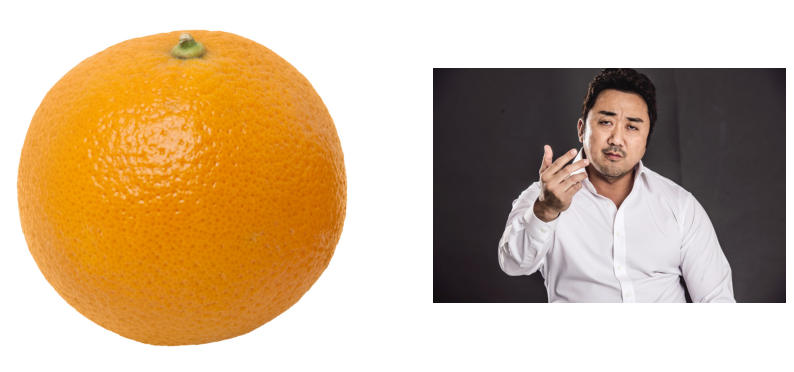

In [30]:
# 사용 할 이미지 경로 입력
selected_image_path = f"{folder_name}/{fruit_image_name}"
selected_image_path_2 = f"{folder_name}/{prepared_image_name}"

img1 = read_url_or_local_image(selected_image_path)
img2 = read_url_or_local_image(selected_image_path_2)

im1Display = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
im2Display = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# 선택한 이미지 미리보기
plt.figure(figsize = (10, 6))
plt.subplot(121); plt.imshow(im1Display); plt.axis('off');
plt.subplot(122); plt.imshow(im2Display); plt.axis('off');

- 기본값

- 크기
    - left_eye_size : 100
    - right_eye_size : 100
    - mouth_size : 250
- 좌표
    - left_eye_coord_x : 100
    - left_eye_coord_y : 200
    - right_eye_coord_x : 280
    - right_eye_coord_y : 200
    - mouth_coord_x : 200
    - mouth_coord_y : 360


In [31]:
#@title 사용자 설정 (처음엔 기본값으로 실행 해 보세요!)

left_eye_size = "100" #@param {type:"string"}
right_eye_size = "100" #@param {type:"string"}
mouth_size = "250" #@param {type:"string"}

left_eye_coord_x = "100" #@param {type:"string"}
left_eye_coord_y = "200" #@param {type:"string"}

right_eye_coord_x = "280" #@param {type:"string"}
right_eye_coord_y = "200" #@param {type:"string"}

mouth_coord_x = "200" #@param {type:"string"}
mouth_coord_y = "360" #@param {type:"string"}

미리보기!



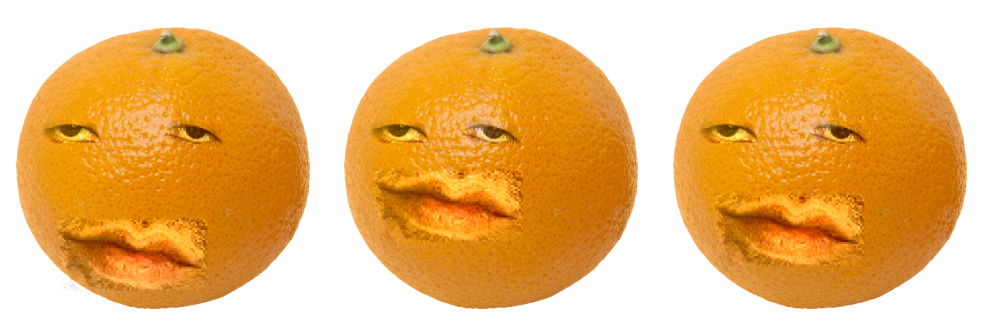

In [34]:
left_eye_positions = [(100, 200), (100, 200), (int(left_eye_coord_x), int(left_eye_coord_y))]
right_eye_positions = [(300, 200), (250, 200), (int(right_eye_coord_x), int(right_eye_coord_y))]
mouth_positions = [(200, 400), (180, 320), (int(mouth_coord_x), int(mouth_coord_y))]

####################################################################################################

# 오렌지 이미지 준비한 것을 opencv의 imread로 읽어서 orange_img에 저장
# orange_img = cv2.imread('/content/drive/MyDrive/annoying_face/orange.jpg')
orange_img = cv2.imread(folder_name + "/" + fruit_image_name)

# 가로 512 세로 512로 resize
orange_img = cv2.resize(orange_img, dsize=(512,512))

# dlib 안에 있는 얼굴 영역 탐지 관련 메소드를 초기화
detector = dlib.get_frontal_face_detector()

# ** 68개 점의 랜드 마크를 탐지 **
predictor = dlib.shape_predictor('/content/eameo-faceswap-generator/shape_predictor_68_face_landmarks.dat')

# 이미지 또는 영상 경로 입력
# cap = cv2.VideoCapture('/content/drive/MyDrive/annoying_face/마동석.jpg')
cap = cv2.VideoCapture(folder_name + "/" + prepared_image_name)

# 저장 위치
output_path = folder_name + "/" + "output_" + prepared_image_name

####################################################################################################

while cap.isOpened():
    ret, img = cap.read() # read를 통해 img를 읽어오고

    if not ret: # 보낼 프레임이 없다면 종료
        break

    faces = detector(img) # 얼굴 영역을 인식해줌, 이때 faces에 얼굴 영역 좌표가 담김

    result = orange_img.copy() # Orange 이미지를 복사한 것

    if len(faces) > 0: # 얼굴이 1개 이상이면, 즉 프레임이 여러개이므로 detect된 얼굴도 여러 개
        face = faces[0] # 그중에서 1개(첫 번째)의 얼굴만을 원한다.

        x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
        face_img = img[y1:y2, x1:x2].copy() # img에서 해당 face만 crop(잘라내기)해서 face_img에 저장

        # 랜드마크의 68개 점을 찾는다
        shape = predictor(img, face)
        shape = face_utils.shape_to_np(shape) # 원래 shape는 dlib형태인데 이를 numpy 형태로 바꿔준다.

        for p in shape:
            cv2.circle(face_img, center=(p[0]-x1, p[1]-y1), radius=2, color=255, thickness=-1)

        # ** 눈과 입을 잘라서 오렌지 파일에 붙이는 코드 **
        # eyes
        le_x1 = shape[36, 0] # **왼쪽 눈을 자르기 위해 x좌표 36번 39번, y좌표 37번 41번 인덱스가 필요**
        le_y1 = shape[37, 1]
        le_x2 = shape[39, 0]
        le_y2 = shape[41, 1]
        le_margin = int((le_x2 - le_x1) * 0.18) # 너무 가깝게 자르면 안 되니까 margin을 준다

        re_x1 = shape[42, 0] # 오른쪽 눈
        re_y1 = shape[43, 1]
        re_x2 = shape[45, 0]
        re_y2 = shape[47, 1]
        re_margin = int((re_x2 - re_x1) * 0.18)

        # 여기서 왼쪽 눈과 오른쪽 눈에 margin을 준 값을 crop한다.
        left_eye_img = img[le_y1-le_margin:le_y2+le_margin, le_x1-le_margin:le_x2+le_margin].copy()
        right_eye_img = img[re_y1-re_margin:re_y2+re_margin, re_x1-re_margin:re_x2+re_margin].copy()

        #
        left_eye_img = resize(left_eye_img, width=int(left_eye_size)) # 가로를 100(기본값)으로 resize
        right_eye_img = resize(right_eye_img, width=int(right_eye_size))

        # mouth
        mouth_x1 = shape[48, 0]
        mouth_y1 = shape[50, 1]
        mouth_x2 = shape[54, 0]
        mouth_y2 = shape[57, 1]
        mouth_margin = int((mouth_x2 - mouth_x1) * 0.1)

        mouth_img = img[mouth_y1-mouth_margin:mouth_y2+mouth_margin, mouth_x1-mouth_margin:mouth_x2+mouth_margin].copy()

        mouth_img = resize(mouth_img, width=int(mouth_size))

####################################################################################################

        if len(faces) > 0:
            face = faces[0]
            x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
            face_img = img[y1:y2, x1:x2].copy()

            shape = predictor(img, face)
            shape = face_utils.shape_to_np(shape)

            # 여러 좌표에 대한 결과 이미지를 저장할 리스트
            result_images = []

            # 각 좌표에 대해 합성 수행하고 결과 이미지를 리스트에 저장
            for left_eye_position, right_eye_position, mouth_position in zip(left_eye_positions, right_eye_positions, mouth_positions):
                result = orange_img.copy()

                # 눈 합성
                result = cv2.seamlessClone(
                    left_eye_img,
                    result,
                    np.full(left_eye_img.shape[:2], 255, left_eye_img.dtype),
                    left_eye_position,
                    cv2.MIXED_CLONE
                )

                result = cv2.seamlessClone(
                    right_eye_img,
                    result,
                    np.full(right_eye_img.shape[:2], 255, right_eye_img.dtype),
                    right_eye_position,
                    cv2.MIXED_CLONE
                )

                # 입 합성
                result = cv2.seamlessClone(
                    mouth_img,
                    result,
                    np.full(mouth_img.shape[:2], 255, mouth_img.dtype),
                    mouth_position,
                    cv2.MIXED_CLONE
                )

                result_images.append(result)

    print("미리보기!\n")

    # 이미지 미리보기
    fig, axes = plt.subplots(1, len(result_images), figsize=(10, 4))

    for i, result in enumerate(result_images):
        axes[i].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

#### 우클릭으로 직접 선택해서 저장하고 싶으시다면 아래 코드 실행

In [ ]:
# 출력 이미지 크기 지정
image_save_size = 4

for i, result in enumerate(result_images):
    print(f"{i+1}번")
    plt.figure(figsize=(image_save_size, image_save_size))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    print("")

#### 원하는 이미지 저장하기

In [ ]:
import cv2

num_images = len(result_images)

save_choice = input(f"{num_images}개의 이미지 중 몇 번을 저장하시겠습니까? (1-{num_images}): ")
image_number = int(save_choice)

cv2.imwrite(output_path, result_images[image_number - 1])

print("\n아래 경로에 저장되었습니다.\n", output_path)

## 샘플 이미지 출처

- https://github.com/kairess/annoying-orange-face/blob/master/orange.jpg

- https://pds.joongang.co.kr/news/component/htmlphoto_mmdata/201608/04/htm_2016080484837486184.jpg